1.	Изучить материал и примеры, описанные в ходе работы  (датасет iris).  
2.	Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)


In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Загрузка данных breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Создание модели (например, Random Forest Classifier)
model = RandomForestClassifier()

# Перекрестная проверка (Cross-validation)
scores = cross_val_score(model, X, y, cv=5)  # cv=5 означает 5 фолдов для кросс-валидации
print("Средняя точность:", scores.mean())

# Решетчатый поиск (Grid Search) для подбора параметров модели
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

print("Лучшие параметры:", grid_search.best_params_)

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
best_scores = cross_val_score(best_model, X, y, cv=5)
print("Лучшая средняя точность:", best_scores.mean())

# Оценка метрик модели (например, точность, полнота, F1-мера)
# Это зависит от задачи (классификация или регрессия)
# Например, для классификации:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Предсказания модели
predictions = best_model.predict(X)

# Вычисление метрик
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Средняя точность: 0.9631113181183044
Лучшие параметры: {'max_depth': 20, 'n_estimators': 200}
Лучшая средняя точность: 0.9631268436578171
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#3.	Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.

a.	Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint) 

b.	Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (например, от 30 до 65), vacation_prefer – тип отдыха (например, Shopping или Beach holiday), transport_prefer – тип транспорта (например, auto, plane), target – город, в котором проведем отпуск (например, London, Moscow)


In [35]:
import pandas as pd
import numpy as np
import random

# Создаем пустой DataFrame
data = pd.DataFrame(columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])

# Генерация данных для каждой строки
for _ in range(1000):
    salary = 50000  # Установим фиксированную зарплату 50000
    city = random.choice(['Bishkek', 'London', 'Moscow', 'New York'])  # Выбор случайного города
    age = random.randint(30, 65)  # Генерация случайного возраста от 30 до 65 лет
    vacation_prefer = random.choice(['Shopping', 'Beach holiday'])  # Выбор типа отдыха
    transport_prefer = random.choice(['auto', 'plane'])  # Выбор типа транспорта
    target = random.choice(['Bishkek', 'London', 'Moscow', 'New York'])  # Выбор города для отпуска
    
    # Добавление данных в DataFrame
    data = data.append({'salary': salary,
                        'city': city,
                        'age': age,
                        'vacation_prefer': vacation_prefer,
                        'transport_prefer': transport_prefer,
                        'target': target},
                       ignore_index=True)

# Вывод первых нескольких строк для проверки
print(data.head())


  salary      city age vacation_prefer transport_prefer    target
0  50000    London  53   Beach holiday             auto    London
1  50000    London  64        Shopping             auto    Moscow
2  50000   Bishkek  43        Shopping             auto    Moscow
3  50000  New York  53   Beach holiday            plane  New York
4  50000    Moscow  55   Beach holiday             auto   Bishkek


c.	Преобразовать категориальные данные в числовые, используя panadas.get_dummies.

In [36]:
# Преобразование категориальных данных в числовые с помощью One-Hot Encoding (get_dummies)
data_encoded = pd.get_dummies(data, columns=['city', 'vacation_prefer', 'transport_prefer'])

# Вывод первых нескольких строк для проверки
print(data_encoded.head())

  salary age    target  city_Bishkek  city_London  city_Moscow  city_New York  \
0  50000  53    London             0            1            0              0   
1  50000  64    Moscow             0            1            0              0   
2  50000  43    Moscow             1            0            0              0   
3  50000  53  New York             0            0            0              1   
4  50000  55   Bishkek             0            0            1              0   

   vacation_prefer_Beach holiday  vacation_prefer_Shopping  \
0                              1                         0   
1                              0                         1   
2                              0                         1   
3                              1                         0   
4                              1                         0   

   transport_prefer_auto  transport_prefer_plane  
0                      1                       0  
1                      1              

d.	Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)

In [37]:
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Разделение на обучающую и тестовую выборки (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


e.	Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)

In [38]:
# Создание модели RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

f.	Проверить оценку модели.

In [39]:
# Оценка производительности модели на тестовых данных
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.265


g.	Сделать предсказание на случайных данных.

In [40]:
# Генерация новых случайных данных для предсказания
random_salary = 50000
random_city = random.choice(['Bishkek', 'London', 'Moscow', 'New York'])
random_age = random.randint(30, 65)
random_vacation_prefer = random.choice(['Shopping', 'Beach holiday'])
random_transport_prefer = random.choice(['auto', 'plane'])

# Создание DataFrame с одной строкой случайных данных
random_data = pd.DataFrame({
    'salary': [random_salary],
    'city': [random_city],
    'age': [random_age],
    'vacation_prefer': [random_vacation_prefer],
    'transport_prefer': [random_transport_prefer]
})

# Преобразование категориальных данных в числовой формат с помощью One-Hot Encoding
random_data_encoded = pd.get_dummies(random_data, columns=['city', 'vacation_prefer', 'transport_prefer'])

# Заполнение отсутствующих столбцов нулями
missing_cols = set(X_train.columns) - set(random_data_encoded.columns)
for col in missing_cols:
    random_data_encoded[col] = 0

# Выбор только признаков для предсказания
random_features = random_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Предсказание с использованием обученной модели
prediction = model.predict(random_features)
print("Prediction:", prediction)

Prediction: ['London']


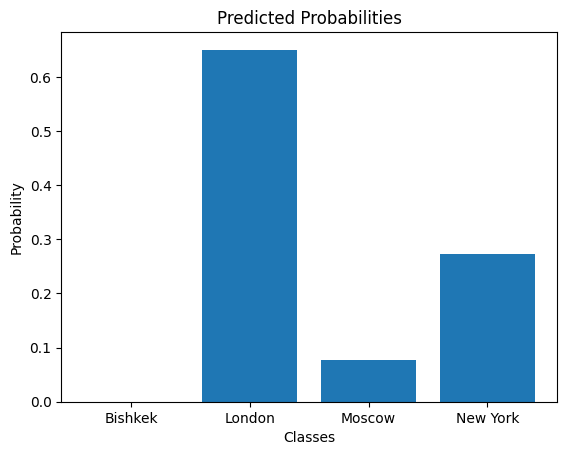

In [41]:
# Визуализация результатов предсказания

# Например, можно вывести вероятности принадлежности к классам
predicted_probabilities = model.predict_proba(random_features)
classes = model.classes_
plt.bar(classes, predicted_probabilities.ravel())
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Predicted Probabilities')
plt.show()



h.	Улучшить модель согласно примеров лекций 9-10 и материала лабораторной работы

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# Преобразование категориальных данных в числовой формат
data_encoded = pd.get_dummies(data, columns=['city', 'vacation_prefer', 'transport_prefer'])

# Разделение на признаки и целевую переменную
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_cols = ['salary', 'age']  # предположим, что 'salary' и 'age' являются числовыми признаками
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Эксперименты с разными моделями классификации
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Настройка гиперпараметров моделей
params = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]},
    'SVM': {'C': [1, 10, 100], 'gamma': ['scale', 'auto']},
    'KNN': {'n_neighbors': [3, 5, 7]}
}

# Подбор оптимальных гиперпараметров для каждой модели
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Оценка производительности моделей на тестовой выборке
for name, model in best_models.items():
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy:', accuracy)


RandomForest Accuracy: 0.28
GradientBoosting Accuracy: 0.28
SVM Accuracy: 0.27
KNN Accuracy: 0.26


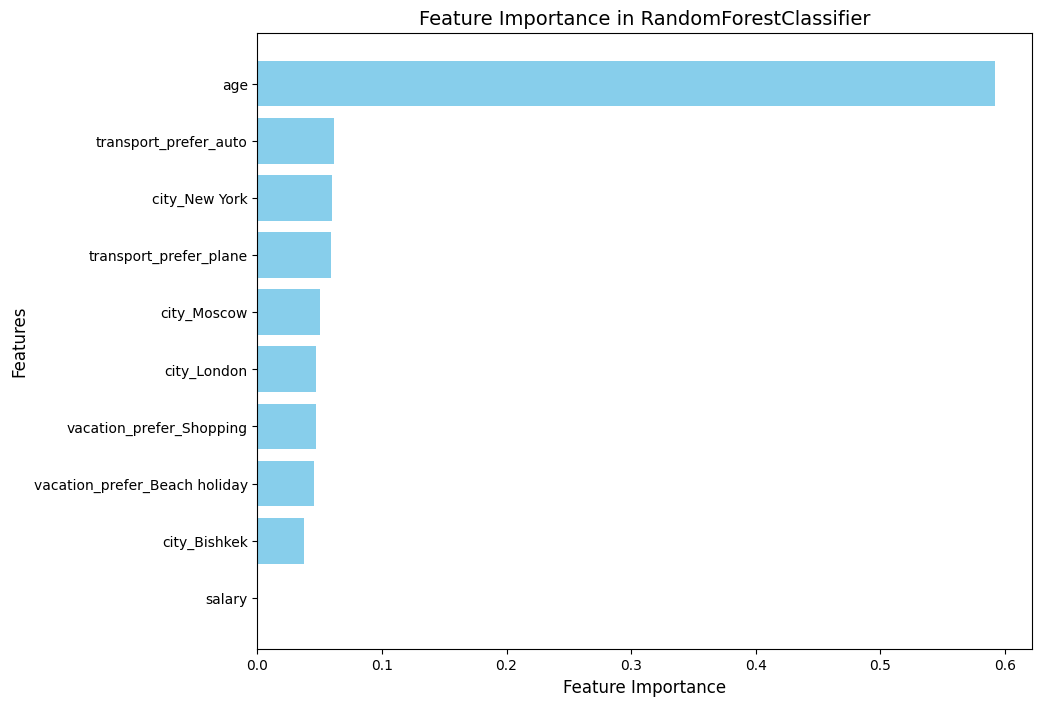

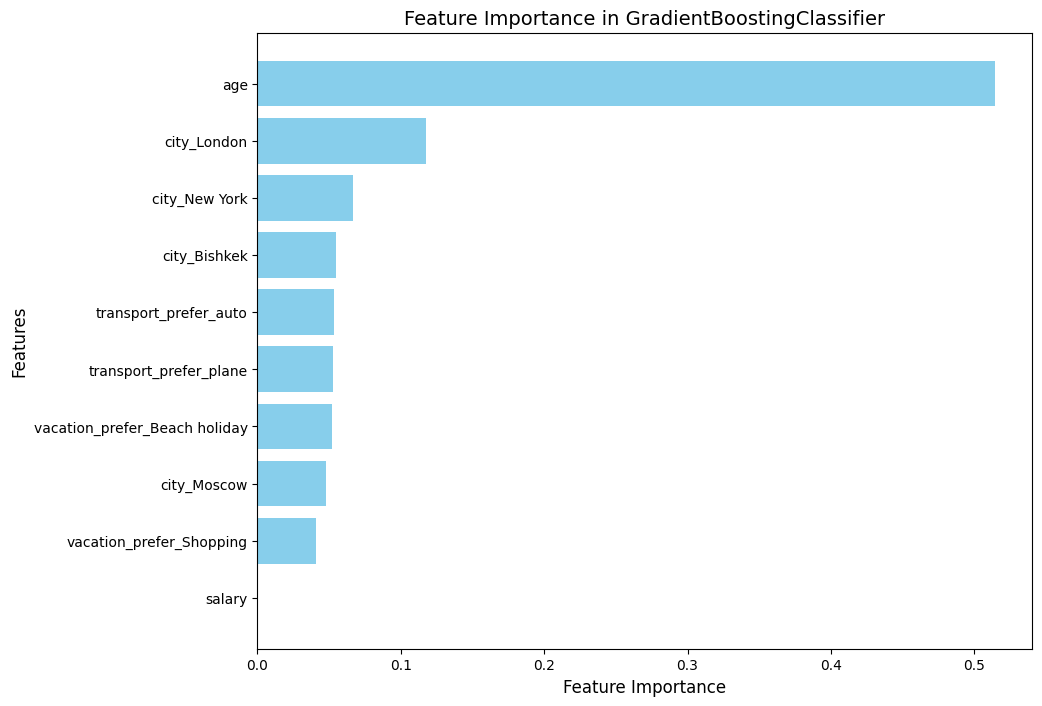

In [43]:
# Визуализация важности признаков для RandomForestClassifier
rf_model = best_models['RandomForest']
feature_importances_rf = rf_model.feature_importances_
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in RandomForestClassifier', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Визуализация важности признаков для GradientBoostingClassifier
gb_model = best_models['GradientBoosting']
feature_importances_gb = gb_model.feature_importances_
importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df_gb['Feature'], importance_df_gb['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in GradientBoostingClassifier', fontsize=14)
plt.gca().invert_yaxis()
plt.show()
